*****
## Necessary Imports

In [1]:
import os

# Change working directory
os.chdir(r'd:\Programing\Youtube_Comment_Sentiments_&_Type_Analysis')

print("Current working directory:", os.getcwd())

Current working directory: d:\Programing\Youtube_Comment_Sentiments_&_Type_Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import banglanltk
import re
import random
import string
import joblib

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bnltk.stemmer import BanglaStemmer
from wordcloud import WordCloud
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# set working directory
import os
os.chdir(r'd:\Programing\Youtube_Comment_Sentiments_&_Type_Analysis')

import warnings
warnings.filterwarnings("ignore")

# custom module
from scripts.utils import *
# from modules.bangla_stopwords import bangla_stopwords
# from modules.slang_text import slang_text_dict

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sajan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Dataset and Check Basic Statistics
This Dataset was collected from: [Kaggle](http://kaggle.com/datasets/nit003/bangla-youtube-sentiment-and-emotion-datasets)

In [3]:
df = pd.read_csv('data/Sentiment.csv', sep=';', encoding='utf-8')
df.head()

,id,text,label,score,lan,domain
0,2283,Your are very good. keep it up,1,1,EN,funny_video
1,2286,চাকিপ ক্যানের মুবি রিব্যু বেচি বেচি,1,0,BN,funny_video
2,2289,আপনি বাংলাদেশী এইটা সত্যি অবাক করার বিষয়,1,0,BN,funny_video
3,2296,নতুন নতুন সিমেনার চাই,1,0,BN,funny_video
4,2300,Eto buddhi kibhabe shomvob,2,1,RN,funny_video


In [4]:
df.drop(columns=['id', 'lan', 'domain', 'label'], inplace=True)
df.head()

,text,score
0,Your are very good. keep it up,1
1,চাকিপ ক্যানের মুবি রিব্যু বেচি বেচি,0
2,আপনি বাংলাদেশী এইটা সত্যি অবাক করার বিষয়,0
3,নতুন নতুন সিমেনার চাই,0
4,Eto buddhi kibhabe shomvob,1


In [5]:
# Mapping the sentiment labels  based on datasets info provided by the source
label_map = {
    2 : 'Positive',
    1 : 'Positive',
    0 : 'Neutral',
    -1 : 'Negative',
    -2 : 'Negative'
}

In [6]:
#  Apply the mapping to the 'Sentiment' column
df['sentiment'] = df['score'].map(label_map)

In [7]:
df['sentiment'].value_counts()

sentiment
Positive    3104
Negative    3001
Neutral     2805
Name: count, dtype: int64

In [8]:
df.drop(columns='score', inplace=True)

In [9]:
df.head()

,text,sentiment
0,Your are very good. keep it up,Positive
1,চাকিপ ক্যানের মুবি রিব্যু বেচি বেচি,Neutral
2,আপনি বাংলাদেশী এইটা সত্যি অবাক করার বিষয়,Neutral
3,নতুন নতুন সিমেনার চাই,Neutral
4,Eto buddhi kibhabe shomvob,Positive


In [10]:
# preprocess using custom function
# creating 2 versions of cleaned comments
# Version 1: remove punctuation, special characters, and replace the slang text to train the BERT model
# Version 2: remove punctuation, special characters, stopwords, numbers, bangla numbers to train traditional ML and DL models

df['clean_comment_v1'] = df['text'].apply(remove_emojis)
print("Emojis Removed             [Done]")  # tracking
df['clean_comment_v1'] = df['clean_comment_v1'].apply(remove_html_tags)
print("HTML Tags Removed         [Done]")  # tracking
df['clean_comment_v1'] = df['clean_comment_v1'].apply(remove_urls)
print("URLs Removed               [Done]")  # tracking
df['clean_comment_v1'] = df['clean_comment_v1'].apply(remove_punctuation)
print("Punctuation Removed        [Done]")  # tracking
df['clean_comment_v1'] = df['clean_comment_v1'].apply(remove_special_characters)
print("Special Characters Removed [Done]")  # tracking
df['clean_comment_v1'] = df['clean_comment_v1'].apply(replace_slang)
print("Slang Words Replaced       [Done]")  # tracking
df['clean_comment_v2'] = df['clean_comment_v1'].apply(remove_stopwords)
print("Stopwords Removed          [Done]")  # tracking
df['clean_comment_v2'] = df['clean_comment_v2'].apply(remove_numbers)
print("Numbers Removed            [Done]")  # tracking
df['clean_comment_v2'] = df['clean_comment_v2'].apply(remove_bangla_numbers)
print("Bengali Numbers Removed    [Done]")  # tracking


Emojis Removed             [Done]
HTML Tags Removed         [Done]
URLs Removed               [Done]
Punctuation Removed        [Done]
Special Characters Removed [Done]
Slang Words Replaced       [Done]
Stopwords Removed          [Done]
Numbers Removed            [Done]
Bengali Numbers Removed    [Done]


In [11]:
df['clean_comment_v2'] = df['clean_comment_v2'].apply(lambda x: stem_text(x, verbose=False))
print("Stemming                   [Done]")  # tracking

applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied third rules..
applied four

In [12]:
df.sample(10)

,text,sentiment,clean_comment_v1,clean_comment_v2
750,Apurbo এক রকম নাটক করোনা আর একটু ভিন্ন রকম নাট...,Positive,apurbo এক রকম নাটক করোনা আর একটু ভিন্ন রকম নাট...,apurbo নাটক করোনা একটু নাটক করো নাটক ভালো লাগে
4359,Asole baba ma bujte cay na .poralekhar chap\n,Negative,asole baba ma bujte cay na poralekhar chap,asol baba bujt cay na poralekhar chap
3881,নাটক টা সুন্দর 😍😍 তবে একটা কথা না বলে পারছিনা ...,Positive,নাটক টা সুন্দর তবে একটা কথা না বলে পারছিনা বাজ...,নাটক সুন্দর এক কথা না পারছিনা বাজা আস পথে সবজি...
6335,sar tik kota ami ekmot\n,Positive,sar tik kota ami ekmot,sar tik kota ami ekmot
1135,ভয়ঙ্কর সুন্দর বলে যা থাকে। তাই\n,Positive,ভয়ঙ্কর সুন্দর বলে যা থাকে তাই,ভয়ঙ্কর সুন্দর
5459,The besttttt\n,Positive,the besttttt,besttttt
338,Lol it is so funny\n,Positive,lol it is so funny,lol funni
8497,"আরে ভাই,মানলাম যে ১ম বার স্যাটেলাইট টা বানাতে ...",Neutral,আরে ভাইমানলাম যে ১ম বার স্যাটেলাইট টা বানাতে ৮...,আরে ভাইমান ম স্যাটেলাইট বানা মিলিয়ন ডলার জায়গা...
1051,I'm still 😍😍😍👌👌👌👌👌\n,Negative,im still,im still
1339,Amio suni 2017 te\n,Neutral,amio suni 2017 te,amio suni te


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              8910 non-null   object
 1   sentiment         8910 non-null   object
 2   clean_comment_v1  8910 non-null   object
 3   clean_comment_v2  8910 non-null   object
dtypes: object(4)
memory usage: 278.6+ KB


In [14]:
df['clean_comment_v1'].replace('', np.nan, inplace=True)
df['clean_comment_v2'].replace('', np.nan, inplace=True)
df.dropna(subset=['clean_comment_v1', 'clean_comment_v2'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8842 entries, 0 to 8841
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   text              8842 non-null   object
 1   sentiment         8842 non-null   object
 2   clean_comment_v1  8842 non-null   object
 3   clean_comment_v2  8842 non-null   object
dtypes: object(4)
memory usage: 276.4+ KB


<Axes: xlabel='sentiment'>

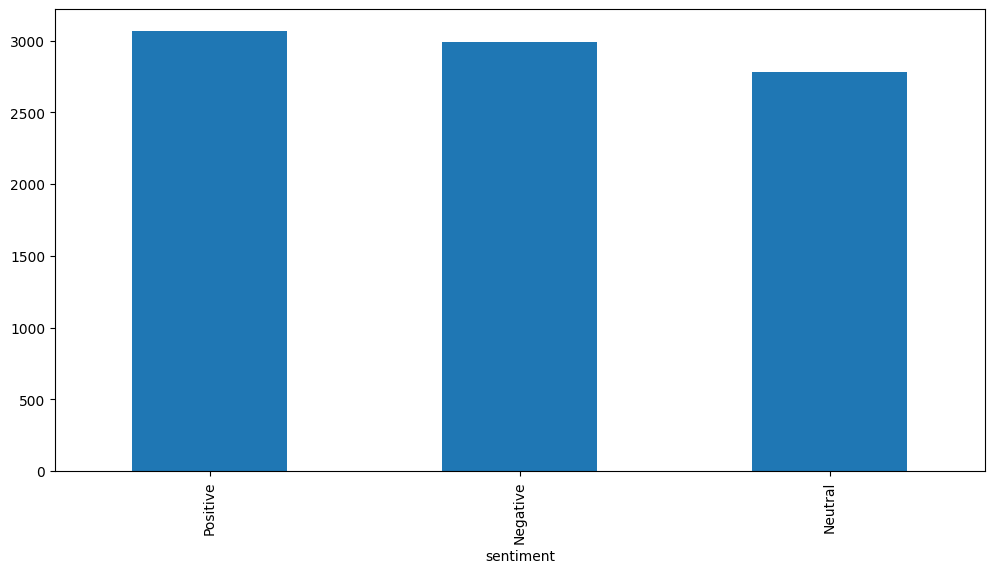

In [15]:
df['sentiment'].value_counts().plot(kind='bar', figsize=(12,6))

In [ ]:
# encode the labels
le = joblib.load('models/sentiment_encoder.pkl')

df['sentiment'] = df['sentiment'].str.lower()
df['sentiment'] = le.transform(df['sentiment'])
df.head()

,text,sentiment,clean_comment_v1,clean_comment_v2
0,Your are very good. keep it up,2,your are very good keep it up,good keep
1,চাকিপ ক্যানের মুবি রিব্যু বেচি বেচি,1,চাকিপ ক্যানের মুবি রিব্যু বেচি বেচি,চাকিপ ক্যান মুবি রিব্যু বেচি বেচি
2,আপনি বাংলাদেশী এইটা সত্যি অবাক করার বিষয়,1,আপনি বাংলাদেশী এইটা সত্যি অবাক করার বিষয়,বাংলাদেশী এই সত্যি অবাক বিষয়
3,নতুন নতুন সিমেনার চাই,1,নতুন নতুন সিমেনার চাই,সিমেন চাই
4,Eto buddhi kibhabe shomvob,2,eto buddhi kibhabe shomvob,eto buddhi kibhab shomvob


In [20]:
df.drop(columns='text', inplace=True)
df = df[['clean_comment_v1', 'clean_comment_v2', 'sentiment']]
df.to_csv('data/evaluation_dataset.csv', index=False, encoding='utf-8')

In [3]:
df = pd.read_csv('data/evaluation_dataset.csv')
df.head()

,clean_comment_v1,clean_comment_v2,sentiment
0,your are very good keep it up,good keep,2
1,চাকিপ ক্যানের মুবি রিব্যু বেচি বেচি,চাকিপ ক্যান মুবি রিব্যু বেচি বেচি,1
2,আপনি বাংলাদেশী এইটা সত্যি অবাক করার বিষয়,বাংলাদেশী এই সত্যি অবাক বিষয়,1
3,নতুন নতুন সিমেনার চাই,সিমেন চাই,1
4,eto buddhi kibhabe shomvob,eto buddhi kibhab shomvob,2


In [4]:
df['type'] = 0
df.head()

,clean_comment_v1,clean_comment_v2,sentiment,type
0,your are very good keep it up,good keep,2,0
1,চাকিপ ক্যানের মুবি রিব্যু বেচি বেচি,চাকিপ ক্যান মুবি রিব্যু বেচি বেচি,1,0
2,আপনি বাংলাদেশী এইটা সত্যি অবাক করার বিষয়,বাংলাদেশী এই সত্যি অবাক বিষয়,1,0
3,নতুন নতুন সিমেনার চাই,সিমেন চাই,1,0
4,eto buddhi kibhabe shomvob,eto buddhi kibhab shomvob,2,0


In [5]:
df.to_csv('data/evaluation_dataset.csv', index=False, encoding='utf-8')